In [2]:
import pandas as pd
import numpy as np
import math

import warnings
warnings.filterwarnings ('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import expon

In [6]:
df = pd.read_csv(r'files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv')
cols = []
for i in range(len(df.columns)):
    cols.append(df.columns[i].lower().replace(' ', '_'))
df.columns = cols
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [7]:
df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [8]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])
df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [9]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
numerical_columns

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [16]:
df_numerical = df[['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies','total_claim_amount']]
df_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [11]:
df.nunique()

customer                         9134
state                               5
customer_lifetime_value          8041
response                            2
coverage                            3
education                           5
effective_to_date                  59
employmentstatus                    5
gender                              2
income                           5694
location_code                       3
marital_status                      3
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
total_claim_amount               5106
vehicle_class                       6
vehicle_size                        3
dtype: int64

0.10648266850745075
0.9087887802741321
-2.250665748388646


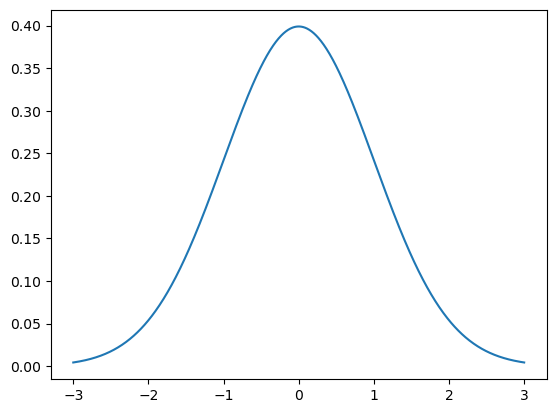

In [12]:
normal = norm(0, math.sqrt(9)) 

print(normal.pdf(2))
print(normal.cdf(4))       
print(normal.rvs()) 

# plotting
fig, ax = plt.subplots(1, 1)
X = np.linspace(-3, 3, 1000)
y = norm.pdf(X)
ax.plot(X, y)
plt.show()

0.13547068621005243
0.9816660363115043
[0.26917104 1.33942292 1.2757618  0.01400637 0.73212202 0.19523757
 0.03874713 0.57650409 0.22976139 0.70656891 0.81804056 0.60627793
 0.83427058 0.14207414 1.21998402 4.42837711 0.01362421 1.24431754
 0.78344374 0.36044115 2.1753741  0.80711827 0.14675842 0.52638036
 1.40144494 1.48043166 0.30796898 0.47002413 0.22691581 0.15306319
 0.09022942 0.81934198 1.73061016]


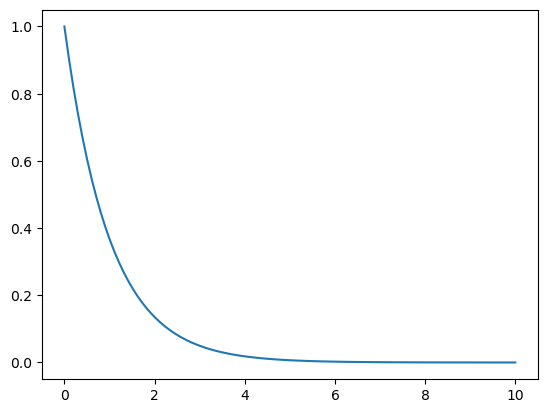

In [14]:
exp = expon(0.001) 

print(exp.pdf(2))
print(exp.cdf(4))       
print(exp.rvs(33)) 

# plotting
X = np.linspace(0, 10, 100)
y = expon.pdf(X)
fig, ax = plt.subplots(1, 1)
ax.plot(X, y)

<Axes: xlabel='customer_lifetime_value', ylabel='Count'>

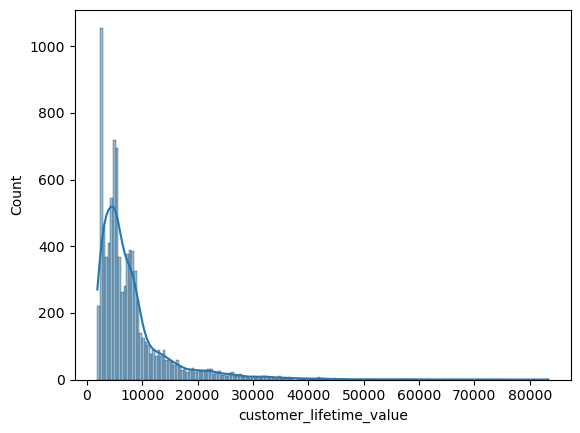

In [18]:
sns.histplot(df_numerical, x = 'customer_lifetime_value', kde = True)

<Axes: xlabel='monthly_premium_auto', ylabel='Count'>

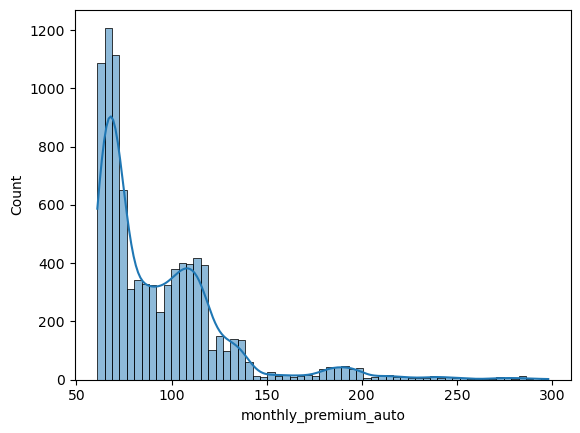

In [20]:
sns.histplot(df_numerical, x = 'monthly_premium_auto', kde = True)

<Axes: xlabel='total_claim_amount', ylabel='Count'>

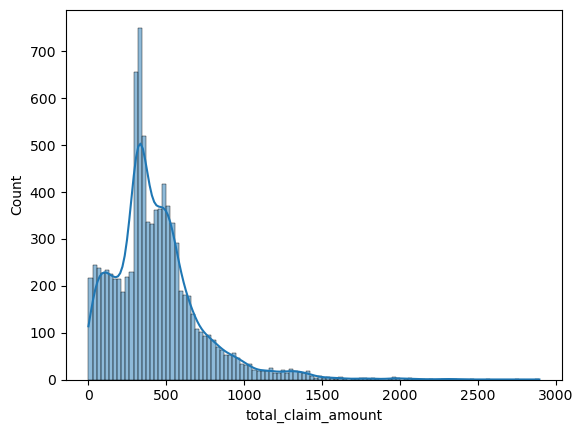

In [21]:
sns.histplot(df_numerical, x = 'total_claim_amount', kde = True)

<Axes: xlabel='income', ylabel='Count'>

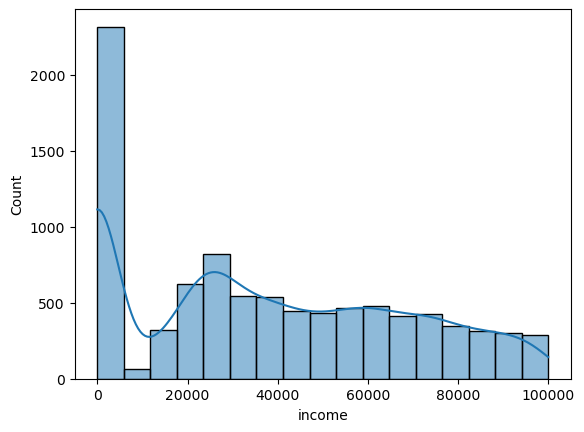

In [22]:
sns.histplot(df_numerical, x = 'income', kde = True)

<Axes: xlabel='months_since_last_claim', ylabel='Count'>

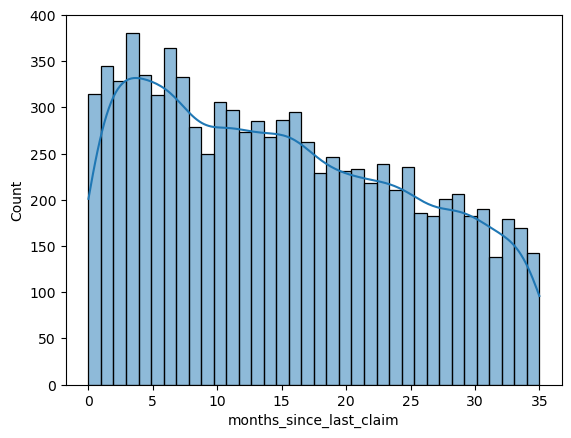

In [23]:
sns.histplot(df_numerical, x = 'months_since_last_claim', bins = 36, kde = True)

<Axes: xlabel='number_of_open_complaints', ylabel='Count'>

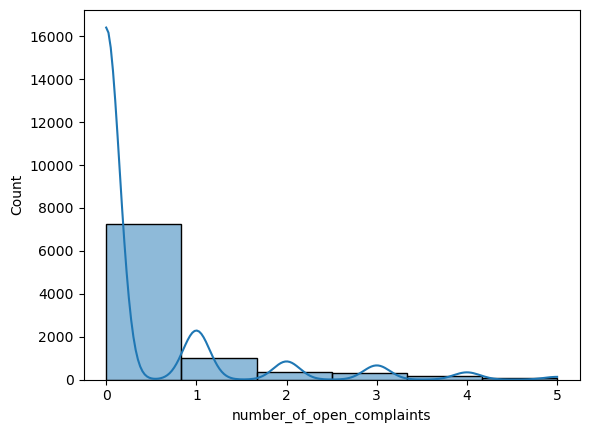

In [24]:
sns.histplot(df_numerical, x = 'number_of_open_complaints', bins = 6, kde = True)

<Axes: xlabel='number_of_policies', ylabel='Count'>

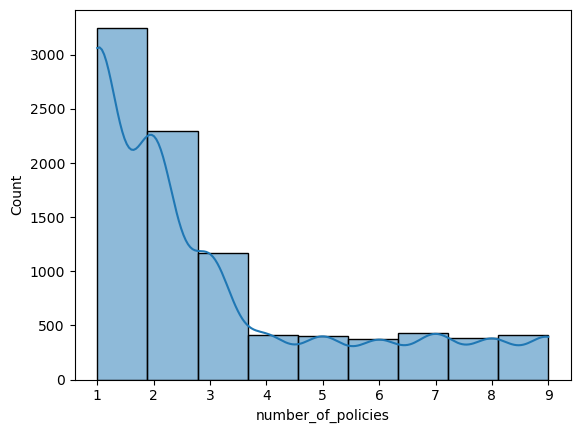

In [25]:
sns.histplot(df_numerical, x = 'number_of_policies', bins = 9, kde = True)

<Axes: xlabel='months_since_policy_inception', ylabel='Count'>

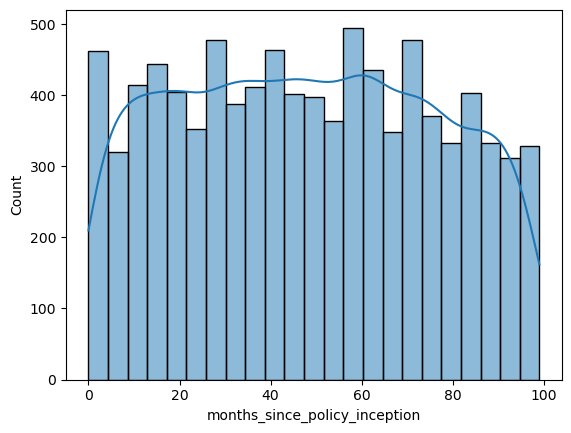

In [26]:
sns.histplot(df_numerical, x = 'months_since_policy_inception', kde = True)

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_numerical)
normalized_data = pd.DataFrame(normalized_data, columns = df_numerical.columns)
normalized_data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710
...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,0.068485
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,0.131034
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,0.273297
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,0.238876


<Axes: xlabel='customer_lifetime_value', ylabel='Count'>

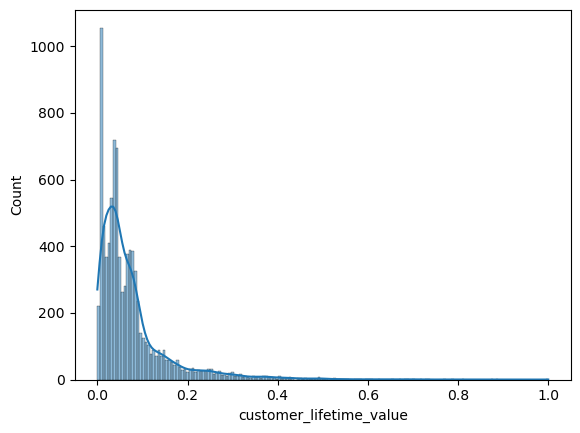

In [28]:
sns.histplot(normalized_data, x = 'customer_lifetime_value', kde = True)

<Axes: xlabel='income', ylabel='Count'>

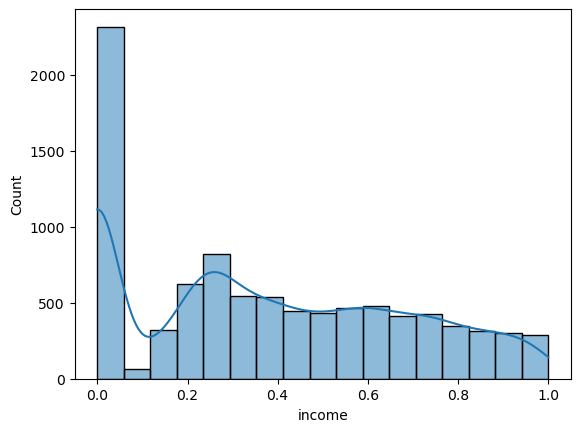

In [29]:
sns.histplot(normalized_data, x = 'income', kde = True)

In [ ]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_numerical)
standardized_data = pd.DataFrame(standardized_data, columns = df_numerical.columns)
standardized_data

In [ ]:
sns.histplot(standardized_data, x = 'customer_lifetime_value', kde = True)

In [ ]:
sns.histplot(standardized_data, x = 'total_claim_amount', kde = True)